In [1]:
'''Loading in required libraries for code'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns
sns.set_theme()
sns.set_context("paper")

In [2]:
'''Loading in the train and testing data sets from kaggle'''

test_data = pd.read_csv('../exoTrain.csv')
train_data = pd.read_csv('../exoTrain.csv')

In [4]:
'''The Labels are 2 for exoplanet and 1 for non exoplanet so we have to switch them to 2->1 and 1->0'''

new_labels_test = []
for i in test_data['LABEL']:
    if i == 2:
        new_labels_test.append(1)
        
    if i == 1:
        new_labels_test.append(0)

test_data = test_data.drop(columns= ['LABEL'])
test_data.insert(0, 'NEW_LABEL', new_labels_test)

In [5]:
'''For both datasets'''

new_labels_train = []
for i in train_data['LABEL']:
    if i == 2:
        new_labels_train.append(1)
        
    if i == 1:
        new_labels_train.append(0)

train_data = train_data.drop(columns= ['LABEL'])
train_data.insert(0, 'NEW_LABEL', new_labels_train)

In [6]:
train_data.describe()

,NEW_LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
'''Remove outliers, shown by scatter plot; removed by IQR or another method'''

'Remove outliers, shown by scatter plot; removed by IQR or another method'

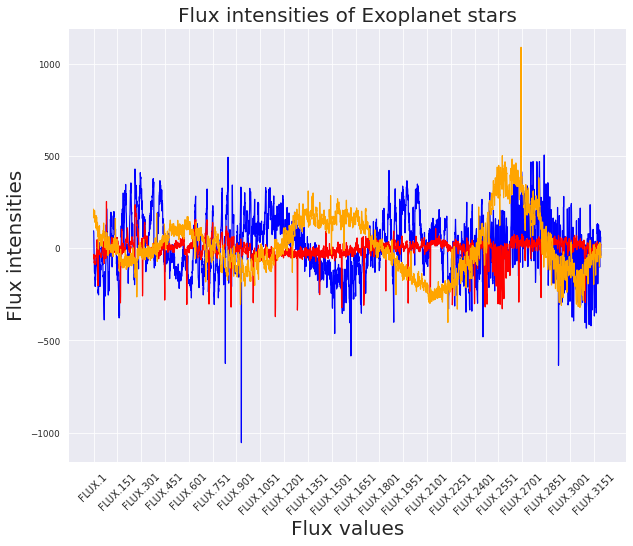

In [24]:
'''Observing the intensity of flux values from training data of exoplanets vs non exoplanets 5 of each'''

plt.figure(figsize = (10,8))
plt.title('Flux intensities of Exoplanet stars', size = 20)

#Exoplanet ones
plt.plot(train_data.iloc[0,1:], color = 'blue')
plt.plot(train_data.iloc[1,1:], color = 'red')
# plt.plot(train_data.iloc[2,1:], color = 'yellow')
# plt.plot(train_data.iloc[4,1:], color = 'green')
plt.plot(train_data.iloc[5,1:], color = 'orange')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,150), size = 10)

plt.show()

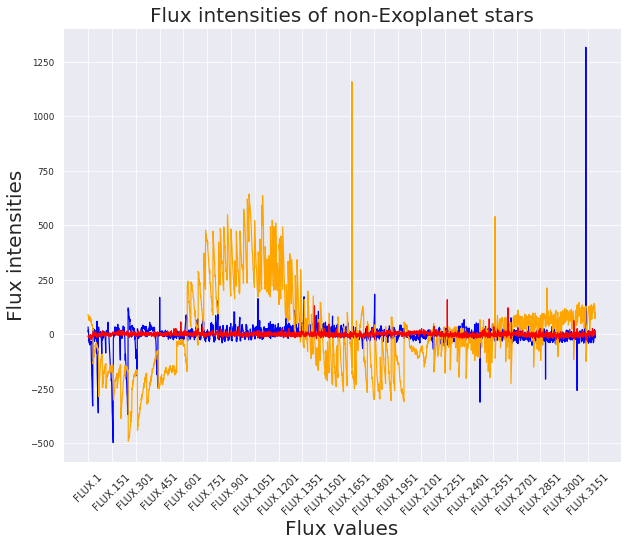

In [25]:
plt.figure(figsize = (10,8))
plt.title('Flux intensities of non-Exoplanet stars', size=20)

plt.plot(train_data.iloc[211,1:], color = 'blue')
# plt.plot(train_data.iloc[200,1:], color = 'green')
# plt.plot(train_data.iloc[300,1:], color = 'yellow')
plt.plot(train_data.iloc[400,1:], color = 'orange')
plt.plot(train_data.iloc[500,1:], color = 'red')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,150), size = 10)


plt.show()

In [10]:
'''Splitting the data into labels and features for both training and testing sets'''

train_fluxes = train_data.drop(columns = ['NEW_LABEL'])

train_labels = train_data['NEW_LABEL']

test_fluxes = test_data.drop(columns = ['NEW_LABEL'])

test_labels = test_data['NEW_LABEL']

In [11]:
'''Normalizing the data'''

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()

train_scaler.fit(train_fluxes) #for 
norm_train_fluxes = train_scaler.transform(train_fluxes)

test_scaler = MinMaxScaler()

test_scaler.fit(test_fluxes)
norm_test_fluxes = test_scaler.transform(train_fluxes)

In [12]:
'''Applying Guassian Filter'''

train_fluxes = ndimage.filters.gaussian_filter(norm_train_fluxes, sigma = 10)

test_fluxes = ndimage.filters.gaussian_filter(norm_test_fluxes, sigma = 10)

In [13]:
'''May need to apply feature scaler unsure at the moment'''

'May need to apply feature scaler unsure at the moment'

In [14]:
'''PCA on data'''



'PCA on data'